**Name:  Sachin Jain**

**NetID: SXJ230042**

**Question that I plan on answering:**

**"What are the various factors that influence the number of applications (dependent variable) on a linkedin job postings in United States?"**

## Step 1: Data Cleaning & Preprocessing for Models

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
import statsmodels.api as sm

In [2]:
base_data = pd.read_csv('job_postings.csv')


In [3]:
base_data.head(20)

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346
5,3757937037,13727.0,Territory Manager - New Haven,"Location: Remote, CT, United States of America...",NaN,NaN,NaN,NaN,Full-time,United States,...,1.700000e+12,Mid-Senior level,NaN,1.699080e+12,www.zoll.com,0,FULL_TIME,NaN,NaN,1699137801
6,3757937004,10515052.0,Auto Body Techncian,Company: Gerber Collision & Glass\n\nWELCOME T...,NaN,NaN,NaN,NaN,Full-time,"Daytona Beach, FL",...,NaN,Entry level,NaN,1.699080e+12,boydgroup.wd1.myworkdayjobs.com,0,FULL_TIME,NaN,NaN,1699089473
7,3757936167,2915.0,"ACME D8- Asst Store Director (ASD) Sussex, NJ",The First Assistant Store Director is actively...,NaN,NaN,NaN,NaN,Full-time,"Sussex, NJ",...,NaN,Mid-Senior level,NaN,1.699090e+12,eofd.fa.us6.oraclecloud.com,0,FULL_TIME,NaN,NaN,1699138852
8,3757936097,18213359.0,Dishwasher,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar...",NaN,19.30,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699089324
9,3757936026,634806.0,Instrumentation Quality Control Representative...,Instrumentation Quality Control Representative...,NaN,NaN,NaN,NaN,Contract,United States,...,NaN,Entry level,NaN,1.699130e+12,jobs.stsigroup.com,0,CONTRACT,NaN,NaN,1699137876


In [4]:
# Removed unnecessary columns 
removed_column_data = base_data.drop(['job_posting_url', 'application_url', 'scraped', 'skills_desc', 'closed_time', 'med_salary'], axis=1)

# Removing rows where 'applies' is NaN
removed_column_data = removed_column_data.dropna(subset=['applies'])

print(removed_column_data['currency'].unique())
removed_column_data = removed_column_data.drop(['currency', 'posting_domain', 'original_listed_time', 'expiry', 'listed_time'], axis = 1)

print(removed_column_data['work_type'].unique())
print(removed_column_data['compensation_type'].unique())
print(removed_column_data['formatted_work_type'].unique())

removed_column_data = removed_column_data.drop(['compensation_type', 'description', 'company_id', 'formatted_work_type'], axis = 1)

[nan 'USD']
['CONTRACT' 'FULL_TIME' 'OTHER' 'PART_TIME' 'VOLUNTEER' 'INTERNSHIP'
 'TEMPORARY']
[nan 'BASE_SALARY']
['Contract' 'Full-time' 'Other' 'Part-time' 'Volunteer' 'Internship'
 'Temporary']


In [5]:
# Drop rows where either min_salary or max_salary is null
df = base_data.dropna(subset=['min_salary', 'max_salary'])

In [6]:
df.shape

(11111, 28)

In [7]:
# Drop rows where either min_salary or max_salary is null
df = base_data.dropna(subset=['min_salary', 'max_salary'])

# Select only the min_salary and max_salary columns
df = df[['min_salary', 'max_salary']]

# Print the DataFrame
print(df)

       min_salary  max_salary
4        205956.0    275834.0
11        58000.0     64000.0
19       125000.0    350000.0
24           20.0        30.0
27       121000.0    150000.0
...           ...         ...
33227        18.0        20.0
33233        50.0        50.0
33236     37000.0     42000.0
33244     45760.0     52000.0
33245     35000.0     80000.0

[11111 rows x 2 columns]


In [8]:
# Drop rows where either pay_period, min_salary or max_salary is null or 'NaN'
base_data = base_data[(base_data['pay_period'].notna() & (base_data['pay_period'] != 'NaN')) &
                      (base_data['min_salary'].notna() & (base_data['min_salary'] != 'NaN')) &
                      (base_data['max_salary'].notna() & (base_data['max_salary'] != 'NaN'))]

# Define the conversion factors
conversion_factors = {
    'YEARLY': 2080,  # Assuming a 40-hour work week
    'MONTHLY': 2080/12,
    'WEEKLY': 40,
    'DAILY': 8,
    'HOURLY': 1,
}

# Convert the salary columns to hourly values
base_data['min_salary'] = base_data.apply(lambda row: row['min_salary'] / conversion_factors.get(row['pay_period'], 1), axis=1)
base_data['max_salary'] = base_data.apply(lambda row: row['max_salary'] / conversion_factors.get(row['pay_period'], 1), axis=1)

In [9]:
# Print the number of rows in the DataFrame
num_rows = base_data.shape[0]
print(f"The number of rows in the DataFrame is {num_rows}.")

The number of rows in the DataFrame is 11111.


In [10]:
# Remove rows where pay_period is 'ONCE'
base_data = base_data[base_data['pay_period'] != 'ONCE']

In [11]:
# Remove the specified columns
base_data = base_data.drop(['currency', 'posting_domain', 'original_listed_time', 'expiry', 'listed_time'], axis = 1)

In [12]:
# Removed unnecessary columns
removed_column_data = base_data.drop(['job_posting_url', 'application_url', 'scraped', 'skills_desc', 'closed_time', 'med_salary'], axis=1)

In [13]:
# Removing rows where 'applies' is NaN
removed_column_data = removed_column_data.dropna(subset=['applies'])


In [14]:
removed_column_data.shape

(6600, 17)

In [15]:
removed_column_data = removed_column_data.drop(['compensation_type', 'description', 'company_id', 'formatted_work_type'], axis = 1)

In [16]:
removed_column_data = removed_column_data.drop(['formatted_experience_level'], axis = 1)

In [17]:
removed_column_data['pay_period'] = removed_column_data['pay_period'].fillna('NOT MENTIONED')
removed_column_data['remote_allowed'] = removed_column_data['remote_allowed'].fillna(0).astype(int)

In [18]:
pay_period_dummies = pd.get_dummies(removed_column_data['pay_period'], prefix='pay_period')
dataset = pd.concat([removed_column_data, pay_period_dummies], axis=1)

In [19]:
dataset['views'] = dataset['views'].fillna(0)

In [20]:
print(dataset['work_type'].unique())

['FULL_TIME' 'PART_TIME' 'CONTRACT' 'TEMPORARY' 'INTERNSHIP' 'OTHER']


In [21]:
work_type_dummies = pd.get_dummies(dataset['work_type'], prefix='work_type')
dataset = pd.concat([dataset, work_type_dummies], axis=1)

In [22]:
dataset.shape

(6600, 22)

In [23]:
print(dataset['application_type'].unique())

['OffsiteApply' 'ComplexOnsiteApply' 'SimpleOnsiteApply']


In [24]:
application_type_dummies = pd.get_dummies(dataset['application_type'], prefix='application_type')
dataset = pd.concat([dataset, application_type_dummies], axis=1)

In [25]:
dataset.loc[dataset['location'].str.lower() == 'united states', 'location'] = 'Unknown'
total_unknown = (dataset['location'] == 'Unknown').sum()
print("Total number of rows with 'Unknown' as location:", total_unknown)


Total number of rows with 'Unknown' as location: 642


In [26]:
dataset.loc[dataset['location'].str.contains('San Francisco', case=False, na=False), 'location'] += ', CA'
dataset.loc[dataset['location'].str.contains('Los Angeles', case=False, na=False), 'location'] += ', CA'
dataset.loc[dataset['location'].str.contains('New York', case=False, na=False), 'location'] += ', NY'
dataset.loc[dataset['location'].str.contains('Phoenix', case=False, na=False), 'location'] += ', AZ'
dataset.loc[dataset['location'].str.contains('Louisville', case=False, na=False), 'location'] += ', KY'
dataset.loc[dataset['location'].str.contains('Sacramento', case=False, na=False), 'location'] += ', CA'
dataset.loc[dataset['location'].str.contains('Baltimore', case=False, na=False), 'location'] += ', MD'
dataset.loc[dataset['location'].str.contains('titusville', case=False, na=False), 'location'] += ', FL'


In [27]:
def remove_extra_commas(text):
    parts = text.rsplit(',', 1)
    if len(parts) == 2: 
        return parts[0].replace(',', '') + ',' + parts[1]
    else:
        return text

dataset['location'] = dataset['location'].apply(remove_extra_commas)

In [28]:
state_to_region = {
    'AK': 'Pacific Northwest', 'WA': 'Pacific Northwest', 'OR': 'Pacific Northwest',
    'CA': 'Southwest', 'NV': 'Southwest', 'AZ': 'Southwest',
    'ID': 'Mountain', 'MT': 'Mountain', 'WY': 'Mountain', 'UT': 'Mountain', 
    'CO': 'Mountain', 'NM': 'Mountain',
    'ND': 'Central Plains', 'SD': 'Central Plains', 'NE': 'Central Plains', 
    'KS': 'Central Plains', 'OK': 'Central Plains',
    'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest', 'WI': 'Midwest', 
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest',
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast', 
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'NJ': 'Northeast', 'PA': 'Northeast',
    'DE': 'Mid-Atlantic', 'MD': 'Mid-Atlantic', 'VA': 'Mid-Atlantic', 
    'WV': 'Mid-Atlantic', 'NC': 'Mid-Atlantic',
    'SC': 'South', 'GA': 'South', 'FL': 'South', 'AL': 'South', 
    'MS': 'South', 'TN': 'South', 'KY': 'South', 'AR': 'South', 'LA': 'South', 'TX': 'South'
}

def update_location(row):
    try:
        city, state_abbr = row['location'].split(', ')
        region = state_to_region.get(state_abbr, 'Unknown')  # Default to 'Unknown' if not found
    except ValueError:
        region = 'Unknown'
    return region

dataset['location'] = dataset.apply(update_location, axis=1)

print(dataset['location'].unique())


['South' 'Northeast' 'Southwest' 'Mountain' 'Mid-Atlantic' 'Unknown'
 'Midwest' 'Pacific Northwest' 'Central Plains']


In [29]:
location_dummies = pd.get_dummies(dataset['location'], prefix='location')
dataset = pd.concat([dataset, location_dummies], axis=1)

In [30]:
dataset = dataset.drop(['location'], axis = 1)

In [31]:
print(dataset.head())

        job_id                  title  max_salary  min_salary pay_period  \
27  3757934319      Controls Engineer   72.115385   58.173077     YEARLY   
49  3757932846  Estimator In Training   20.000000   14.000000     HOURLY   
58  3757932736          Sales Manager  168.269231   60.096154     YEARLY   
64  3757932015          Sales Manager  168.269231   60.096154     YEARLY   
77  3757931759          Sales Manager  168.269231   60.096154     YEARLY   

    applies  remote_allowed  views    application_type  sponsored  ...  \
27      1.0               0    5.0        OffsiteApply          0  ...   
49      1.0               0    2.0        OffsiteApply          0  ...   
58      2.0               1    4.0  ComplexOnsiteApply          0  ...   
64      3.0               1    6.0  ComplexOnsiteApply          0  ...   
77      1.0               1    1.0  ComplexOnsiteApply          0  ...   

   application_type_SimpleOnsiteApply  location_Central Plains  \
27                              

In [32]:
dataset.to_csv("salaries.csv", index = False)

In [33]:
# Check if there are any NA values in the DataFrame
if dataset.isna().values.any():
    print("There are NA values in the DataFrame.")
else:
    print("There are no NA values in the DataFrame.")

There are no NA values in the DataFrame.


In [34]:
dataset.head()

,job_id,title,max_salary,min_salary,pay_period,applies,remote_allowed,views,application_type,sponsored,...,application_type_SimpleOnsiteApply,location_Central Plains,location_Mid-Atlantic,location_Midwest,location_Mountain,location_Northeast,location_Pacific Northwest,location_South,location_Southwest,location_Unknown
27,3757934319,Controls Engineer,72.115385,58.173077,YEARLY,1.0,0,5.0,OffsiteApply,0,...,False,False,False,False,False,False,False,True,False,False
49,3757932846,Estimator In Training,20.000000,14.000000,HOURLY,1.0,0,2.0,OffsiteApply,0,...,False,False,False,False,False,False,False,True,False,False
58,3757932736,Sales Manager,168.269231,60.096154,YEARLY,2.0,1,4.0,ComplexOnsiteApply,0,...,False,False,False,False,False,True,False,False,False,False
64,3757932015,Sales Manager,168.269231,60.096154,YEARLY,3.0,1,6.0,ComplexOnsiteApply,0,...,False,False,False,False,False,True,False,False,False,False
77,3757931759,Sales Manager,168.269231,60.096154,YEARLY,1.0,1,1.0,ComplexOnsiteApply,0,...,False,False,False,False,False,False,False,True,False,False


In [35]:
dataset.columns

Index(['job_id', 'title', 'max_salary', 'min_salary', 'pay_period', 'applies',
       'remote_allowed', 'views', 'application_type', 'sponsored', 'work_type',
       'pay_period_HOURLY', 'pay_period_MONTHLY', 'pay_period_WEEKLY',
       'pay_period_YEARLY', 'work_type_CONTRACT', 'work_type_FULL_TIME',
       'work_type_INTERNSHIP', 'work_type_OTHER', 'work_type_PART_TIME',
       'work_type_TEMPORARY', 'application_type_ComplexOnsiteApply',
       'application_type_OffsiteApply', 'application_type_SimpleOnsiteApply',
       'location_Central Plains', 'location_Mid-Atlantic', 'location_Midwest',
       'location_Mountain', 'location_Northeast', 'location_Pacific Northwest',
       'location_South', 'location_Southwest', 'location_Unknown'],
      dtype='object')

In [36]:
dataset.shape

(6600, 33)

**Variable Significance Models**

In [37]:
final_data = pd.read_csv('salaries.csv')

In [38]:
# Convert boolean columns to int (1 for True and 0 for False)
final_data = final_data.astype({col: 'int' for col in final_data.select_dtypes(include='bool').columns})

## Step 2: Building the right Linear Regression (OLS)  model from scratch

### OLS with all the variables

In [39]:
# Import necessary libraries
import statsmodels.api as sm
import numpy as np

# Select only numeric columns
numeric_final_data = final_data.select_dtypes(include=[np.number])

# Define your dependent variable (replace 'applies' with your dependent variable)
Y = numeric_final_data['applies']

# Define your independent variables (drop the dependent variable and 'job_id' from the DataFrame)
X = numeric_final_data.drop(['applies', 'job_id'], axis=1)

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Run the OLS model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                applies   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1230.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        22:40:39   Log-Likelihood:                -29908.
No. Observations:                6600   AIC:                         5.986e+04
Df Residuals:                    6576   BIC:                         6.003e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## Step 3: Selecting the model with the most significant variables

**Model Selection: Forward Selection**

In [40]:
# Import necessary libraries
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Select only numeric columns
numeric_final_data = final_data.select_dtypes(include=[np.number])

# Define your dependent variable
Y = numeric_final_data['applies']

# Define your independent variables
X = numeric_final_data.drop(['applies', 'job_id'], axis=1)

# List of all possible predictors
predictors = list(X.columns)

# Forward stepwise selection
selected_predictors = []
for i in range(len(predictors)):
    remaining_predictors = list(set(predictors) - set(selected_predictors))
    pvalues = []
    for p in remaining_predictors:
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[selected_predictors + [p]])))
        pvalues.append(model.fit().pvalues[p])
    min_p_value_predictor = remaining_predictors[pvalues.index(min(pvalues))]
    if min(pvalues) < 0.05:
        selected_predictors.append(min_p_value_predictor)
    else:
        break


# Run the OLS model with selected predictors
X_selected = sm.add_constant(X[selected_predictors])
model = sm.OLS(Y, X_selected)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                applies   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     4718.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        22:40:42   Log-Likelihood:                -29912.
No. Observations:                6600   AIC:                         5.984e+04
Df Residuals:                    6593   BIC:                         5.989e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Model Selection using: Stepwise selection**

In [41]:
# Import necessary libraries
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Select only numeric columns
numeric_final_data = final_data.select_dtypes(include=[np.number])

# Define your dependent variable
Y = numeric_final_data['applies']

# Define your independent variables
X = numeric_final_data.drop(['applies', 'job_id'], axis=1)

# List of all possible predictors
predictors = list(X.columns)

# Stepwise selection
selected_predictors = []
while len(predictors) > 0:
    remaining_predictors = list(set(predictors) - set(selected_predictors))
    new_pval = pd.Series(index=remaining_predictors)
    for p in remaining_predictors:
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[selected_predictors + [p]])))
        new_pval[p] = model.fit().pvalues[p]
    min_p_value_predictor = new_pval.idxmin()
    if new_pval.min() < 0.05:
        selected_predictors.append(min_p_value_predictor)
        while len(selected_predictors) > 0:
            selected_pvalues = []
            for p in selected_predictors:
                model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[selected_predictors])))
                selected_pvalues.append(model.fit().pvalues[p])
            max_p_value_predictor = selected_predictors[selected_pvalues.index(max(selected_pvalues))]
            if max(selected_pvalues) > 0.05:
                selected_predictors.remove(max_p_value_predictor)
            else:
                break
    else:
        break

# Run the OLS model with selected predictors
X_selected = sm.add_constant(X[selected_predictors])
model = sm.OLS(Y, X_selected)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                applies   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     4718.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                -29912.
No. Observations:                6600   AIC:                         5.984e+04
Df Residuals:                    6593   BIC:                         5.989e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Stepwise with log model**

In [42]:
# Import necessary libraries
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Select only numeric columns
numeric_final_data = final_data.select_dtypes(include=[np.number])

# Define your dependent variable and take its logarithm
Y = np.log(numeric_final_data['applies'])

# Define your independent variables and take the logarithm of 'views'
X = numeric_final_data.drop(['applies', 'job_id'], axis=1)
X['views'] = np.log(X['views'])

# List of all possible predictors
predictors = list(X.columns)

# Stepwise selection
selected_predictors = []
while len(predictors) > 0:
    remaining_predictors = list(set(predictors) - set(selected_predictors))
    new_pval = pd.Series(index=remaining_predictors)
    for p in remaining_predictors:
        model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[selected_predictors + [p]])))
        new_pval[p] = model.fit().pvalues[p]
    min_p_value_predictor = new_pval.idxmin()
    if new_pval.min() < 0.05:
        selected_predictors.append(min_p_value_predictor)
        while len(selected_predictors) > 0:
            selected_pvalues = []
            for p in selected_predictors:
                model = sm.OLS(Y, sm.add_constant(pd.DataFrame(X[selected_predictors])))
                selected_pvalues.append(model.fit().pvalues[p])
            max_p_value_predictor = selected_predictors[selected_pvalues.index(max(selected_pvalues))]
            if max(selected_pvalues) > 0.05:
                selected_predictors.remove(max_p_value_predictor)
            else:
                break
    else:
        break

# Run the OLS model with selected predictors
X_selected = sm.add_constant(X[selected_predictors])
model = sm.OLS(Y, X_selected)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                applies   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     2138.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        22:40:59   Log-Likelihood:                -6865.2
No. Observations:                6600   AIC:                         1.375e+04
Df Residuals:                    6588   BIC:                         1.384e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

**Observation: Here we see that we are getting the same final model using forward selection & Backward elemination & Stepwise Selection, Thus we will use log stepwise as out final model**

**Final model with the most statistically significant variables:**

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Defining dependent variable
Y = numeric_final_data['applies']

# Defining independent variables
X = numeric_final_data[['views', 'application_type_OffsiteApply', 'pay_period_HOURLY', 'sponsored', 'remote_allowed', 'work_type_CONTRACT', 'location_Central Plains', 'application_type_ComplexOnsiteApply', 'application_type_SimpleOnsiteApply', 'location_Midwest']]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Adding a constant to the independent variables matrix
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Running the OLS model
model = sm.OLS(Y_train, X_train)
results = model.fit()

# Print the summary
print(results.summary())

# Make predictions on the testing data
Y_pred = results.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = sqrt(mse)  # or mse**(0.5)  
r2 = r2_score(Y_test, Y_pred)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

                            OLS Regression Results                            
Dep. Variable:                applies   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     2635.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        22:41:00   Log-Likelihood:                -23999.
No. Observations:                5280   AIC:                         4.802e+04
Df Residuals:                    5270   BIC:                         4.808e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## STEP 4: Next we check if the model is following the Multiple Linear Regressor properties so that the results are reliable, and if yes we finalize the OLS model

                             variables       VIF
0                                views  1.123125
1        application_type_OffsiteApply  1.518158
2                    pay_period_HOURLY  1.417559
3                            sponsored  1.048108
4                       remote_allowed  1.148788
5                   work_type_CONTRACT  1.486379
6              location_Central Plains  1.003374
7  application_type_ComplexOnsiteApply  2.023505
8   application_type_SimpleOnsiteApply  1.061725
9                     location_Midwest  1.012128


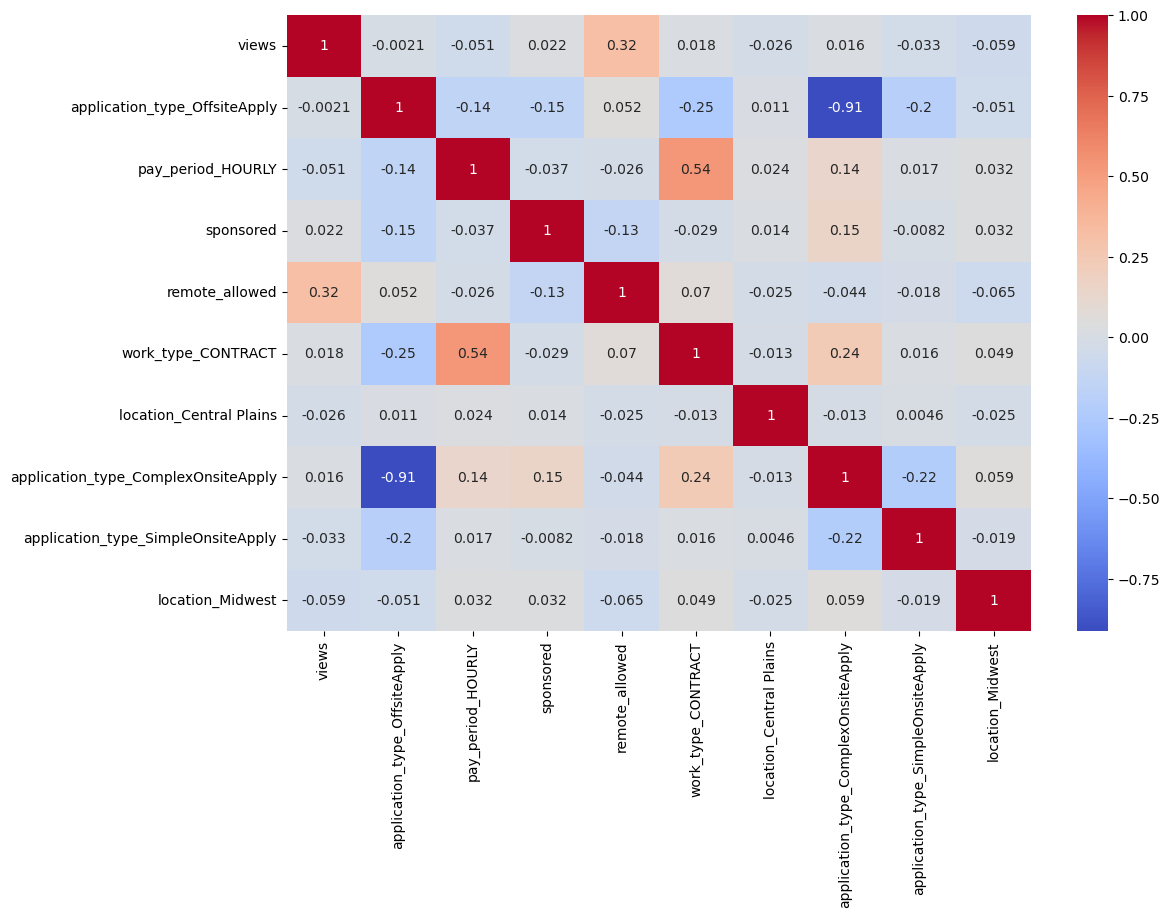

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Calculate and print VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

# Also, we can plot a correlation matrix to visualize the correlation between the variables
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

**Assumption MLR.1. Linear in Parameters** (Satisfied)

This is satisfied by construction as the model is specified as linear in parameters.

**Assumption MLR.2. Random Sampling** (Satisfied)

This is more of a study design issue. We assume that the data we are working with is a random sample since this data has been collected trough web sccraping.

**Assumption MLR.3. No Perfect Collinearity** (Satisfied)

We can check this by looking at the Variance Inflation Factor (VIF) for each of the independent variables.
VIF starts at 1 and has no upper limit.
VIF = 1, no correlation between the independent variable and the other variables.
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.

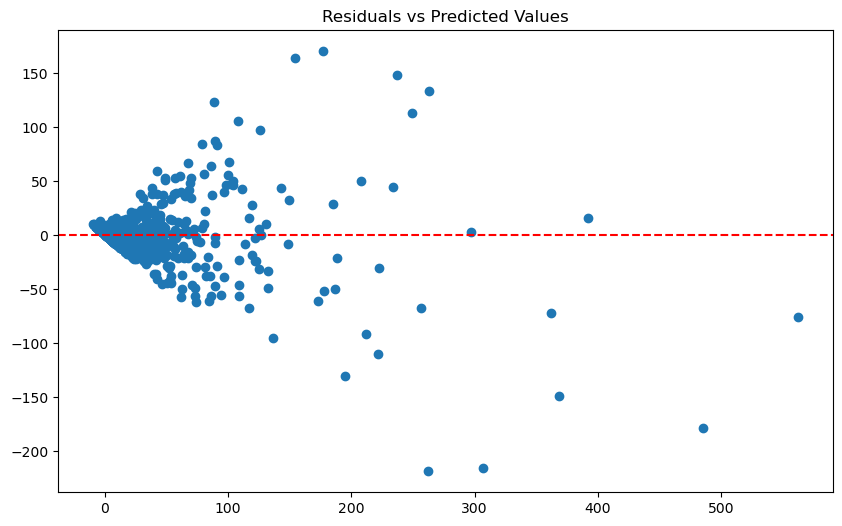

In [45]:
import statsmodels.stats.api as sms
import scipy.stats as stats

# Calculate residuals
residuals = Y_test - Y_pred

# Check for Zero Conditional Mean
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.show()




**MLR.4 Zero conditional mean is reasonably satisfied to have zero conditional mean of the residuals, although there is a slight variation from zero.**

{'LM Statistic': 512.7098267170182, 'LM-Test p-value': 8.480742570175297e-104, 'F-Statistic': 92.44230406410352, 'F-Test p-value': 3.0982357131544496e-133}


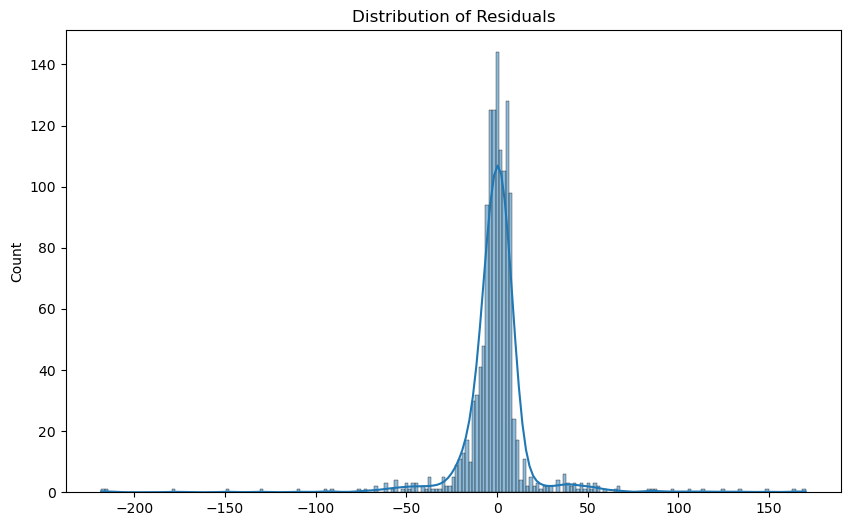

In [46]:
# Breusch-Pagan Test for Homoskedasticity
bp_test = sms.het_breuschpagan(residuals, X_test)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

# Histogram for Normality
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

**Breusch-Pagan test indicates heteroscedasticity is present & MLR.5 Homoskedasticity assumption is not satisfied. We adjusted our standard errors to remain robust against heteroscedasticity using the heteroskedasticity-robust standard errors method, This method is also known as White Standard Errors Method (Economist Halbert White)**

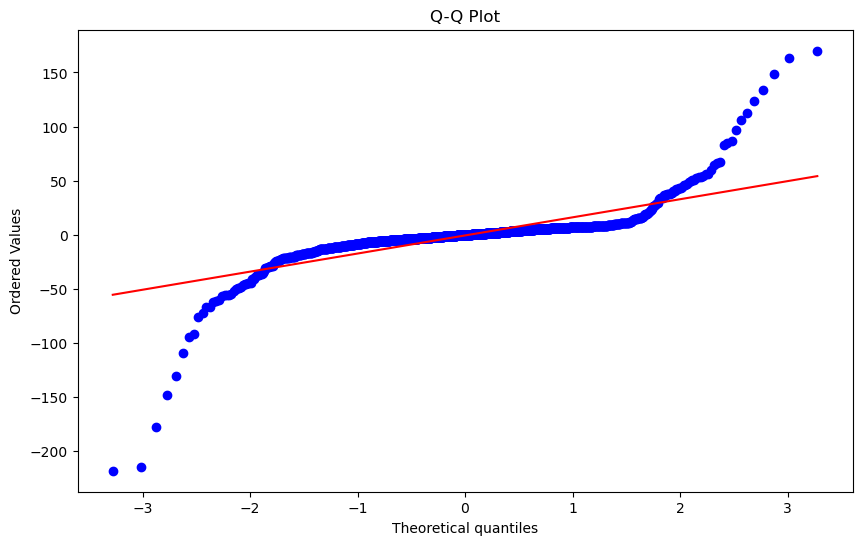

In [47]:
# Q-Q Plot for Normality
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

**MLR.6 Normality assumption is satisfied because our histogram is almost having a bell shape and the distribution of residuals is almost symmetric and  not deviating from the expected normal distribution.**

**Coclusion:  The model satisfies all the Multiple Resgressor Properties, thus we can say it is a reliable model and unlikely to have biases. Before finalizing this model, we compare it with various other models in the next steps.**

## Step 5: Now we build various machine learning models and see which model gives us the most reliable results and based on that we finalize our final model and proceed with answering the question.

In [49]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define a list of models to be evaluated
models = [
    LinearRegression(),  # OLS model
    Lasso(),  # Lasso regression model
    DecisionTreeRegressor(),  # Decision tree regressor
    RandomForestRegressor(),  # Random forest regressor
    SVR(),  # Support vector regressor
    
]

# Define the parameter grid for the grid search
param_grid = {
    'colsample_bytree': [0.3, 0.7],  # Subsample ratio of columns when constructing each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevents overfitting
    'max_depth': [4, 5, 6],  # Maximum depth of a tree
    'alpha': [5, 10, 15],  # L1 regularization term on weights
    'n_estimators': [10, 50, 100, 200]  # Number of gradient boosted trees
}

# Initialize the grid search model
grid = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), param_grid, verbose=3)

# Loop over each model in the list
for model in models:
    # If the model is XGBoost, perform grid search
    if model.__class__.__name__ == 'XGBRegressor':
        # Fit the grid search model
        grid.fit(X_train, Y_train)
        # Print the best parameters found by the grid search
        print("Best parameters found: ",grid.best_params_)
        # Get the best estimator found by the grid search
        model = grid.best_estimator_
    
    # Train the model on the training data
    model.fit(X_train, Y_train)
    # Use the trained model to make predictions on the test data
    Y_pred = model.predict(X_test)
    
    # Calculate the mean absolute error of the predictions
    mae = mean_absolute_error(Y_test, Y_pred)
    # Calculate the mean squared error of the predictions
    mse = mean_squared_error(Y_test, Y_pred)
    # Calculate the root mean squared error of the predictions
    rmse = sqrt(mse)
    # Calculate the R-squared score of the predictions
    r2 = r2_score(Y_test, Y_pred)
    
    # Print the model name and performance metrics
    print(f'Model: {model.__class__.__name__}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared: {r2}\n')

Model: LinearRegression
Mean Absolute Error (MAE): 9.948353420851847
Mean Squared Error (MSE): 458.7064634770995
Root Mean Squared Error (RMSE): 21.417433634240577
R-squared: 0.7663728065435824

Model: Lasso
Mean Absolute Error (MAE): 9.429291592861537
Mean Squared Error (MSE): 466.07017993665454
Root Mean Squared Error (RMSE): 21.588658595120137
R-squared: 0.7626223374596852

Model: DecisionTreeRegressor
Mean Absolute Error (MAE): 11.089248904943775
Mean Squared Error (MSE): 985.2299049667563
Root Mean Squared Error (RMSE): 31.388372129926655
R-squared: 0.49820524467450056

Model: RandomForestRegressor
Mean Absolute Error (MAE): 9.219951723573129
Mean Squared Error (MSE): 571.9674826040222
Root Mean Squared Error (RMSE): 23.91584166622664
R-squared: 0.708686996262957

Model: SVR
Mean Absolute Error (MAE): 9.706059874066039
Mean Squared Error (MSE): 855.8482363463286
Root Mean Squared Error (RMSE): 29.25488397424144
R-squared: 0.5641015825969502



**Analysis**

The performance of the Decision Tree Regressor and SVR models is notably weaker compared to others, with both showing higher error rates and significantly lower R-squared values. This suggests that these models are less effective at accurately predicting and modeling the variability in the dependent variable.

The Random Forest Regressor, while improving upon the Decision Tree in terms of error metrics and the R-squared value, does not emerge as the top model among those listed. It offers better predictability and consistency than the Decision Tree, but there are still better options.

Lasso Regression provides a slightly better mean absolute error (MAE) than Linear Regression, suggesting it can predict with less deviation on average. However, it falls behind in mean squared error (MSE), root mean squared error (RMSE), and R-squared, indicating that while it might simplify the model, it does so at the cost of some accuracy.

Linear Regression stands out for its balanced performance. It shows relatively low error rates across the board and the highest R-squared value, meaning it captures a substantial portion of the variance in the data. This indicates a strong ability to predict the dependent variable accurately across various scenarios.

**Conclusion**

Considering the overall analysis, Linear Regression is the standout model among those reviewed. It not only shows the highest capacity for explaining the variance in the dataset (as evidenced by its R-squared value) but also maintains favorable error metrics, balancing simplicity in the model with effective performance. While Lasso Regression also shows promise, it slightly underperforms on several key metrics, making Linear Regression the more preferable option for both its straightforwardness and strong predictive power.

**Thus we finalize the linear regression model and proceed with interpriting our findings to answer our question.**

## Step 6: The following is our final model & our findings:

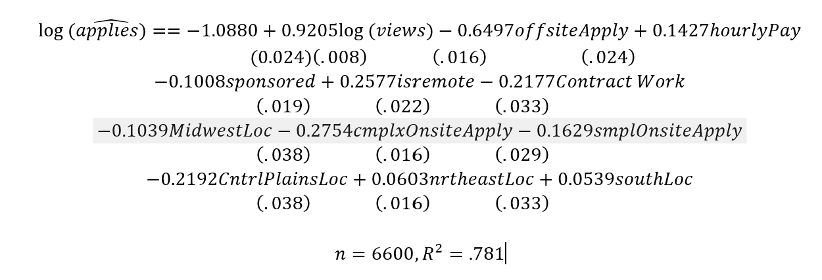

**Now finally let's try to understand how various significant factors influence the no of application on linkedin and whay could be the possible reason behind it:** 

1. **Views**:

   - **Interpretation**: A 1% increase in views increases applications by about 0.92%.
   - **Explanation**: This is quite straight forward - More views mean higher exposure, which naturally leads to more people considering and applying for the job. This relationship underscores the importance of job visibility in the recruitment process.


2. **Application Type**:

   - **Offsite Apply**:
     - **Interpretation**: Using Offsite Apply decreases applications by about 65% thats hudge!.
     - **Explanation**: This significant drop likely results from the inconvenience of navigating away from the familiar platform to complete the application process, which can deter potential applicants. While I did expect this, I did not expect the magnitude to be so high.
     
   - **Simple Onsite Apply**:
     - **Interpretation**: Using Simple Onsite Apply decreases applications by about 16.29%.
     - **Explanation**: Although simpler than offsite applications, even minimal complexity or additional steps required onsite can dissuade some job seekers, indicating a preference for utmost simplicity.Or maybe this could also include the percentage of people who in general don't find a job worth applying after reading the description.
     
   - **Complex Onsite Apply**:
     - **Interpretation**: Complex Onsite Apply decreases applications by about 27.54%.
     - **Explanation**: Complexity within the application process, even when onsite, significantly reduces applicant numbers. Job seekers favor straightforward processes, and perceived hurdles can be a major turn-off. This was quite interesting!

3. **Pay Period**:

   - **Interpretation**: Hourly jobs increase applications by about 14.27%.
   - **Explanation**: Hourly roles often appeal to a broader demographic, including those seeking part-time work or more flexible schedules, which can explain the higher application rates.

4. **Sponsorship**:

   - **Interpretation**: Offering sponsorship decreases applications by about 10.08%.
   - **Explanation**: While seemingly counterintuitive, this decrease can reflect the specialized nature of such roles. Sponsored positions often require specific qualifications or visas, narrowing the pool of eligible applicants. Or maybe this is because it actually increases the competition for people who do not need sponsorship, so they choose not to apply to escape this competition.

5. **Type of Work**:

   - **Interpretation**: Remote jobs increase applications by about 25.77%.
   - **Explanation**: The option to work remotely is highly attractive to americans, reflecting current work trends towards flexibility and the desire to maintain a work-life balance, which draws a larger number of applicants.

6. **Location**:

   - **Midwest and Central Plains**:
     - **Interpretation**: Jobs in these regions see fewer applications by about 10.39% and 21.92%, respectively.
     - **Explanation**: These areas might be less appealing due to economic factors, lower population densities, or fewer industry hubs in the cental plains, which can limit the number of local job seekers. I definitely think there might be something we are not accounting for here because the west cost is literally the tech hub. But again the taxes are much higher there too. I'd do more research before choosing this to make any decisions. 
     
   - **Northeast and South**:
     - **Interpretation**: Jobs in these regions attract more applications, by about 6.03% and 5.39% respectively.
     - **Explanation**: Higher population densities and potentially more vibrant economic conditions make these regions more attractive for job seekers, reflecting in higher application numbers. But again there might be more to the picture and making any direct inferences for this feature is hard at the moment.

Understanding these factors could help organizations tailor their recruitment strategies effectively. By knowing what deters or attracts applicants, companies can adjust how they present job openings, where they post them, and the nature of the application process to maximize their reach and appeal to the ideal candidate pool.

Note: The coefficients are interpreted by controlling for all other variables. 